In [219]:
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [220]:
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f']
base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
folder = f"{base_path}"
save = False
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

In [222]:
first_analysis_df = pd.read_csv(f"{folder}/2023-01-09-18-37-08_first_analysis.csv").drop("Unnamed: 0", axis=1)
all_res_df = pd.read_csv(f"{folder}/2023-01-09-18-37-08_all_res_df.csv").drop("Unnamed: 0", axis=1)

In [223]:
print(f'number of architectures is: {first_analysis_df.shape[0]}')

Traceback (most recent call last):
  File "/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_process_net_command.py", line 476, in process_net_command
    cmd_id == CMD_EXEC_EXPRESSION, int(trim) == 1, temp_name)
ValueError: invalid literal for int() with base 10: ''


KeyboardInterrupt: 

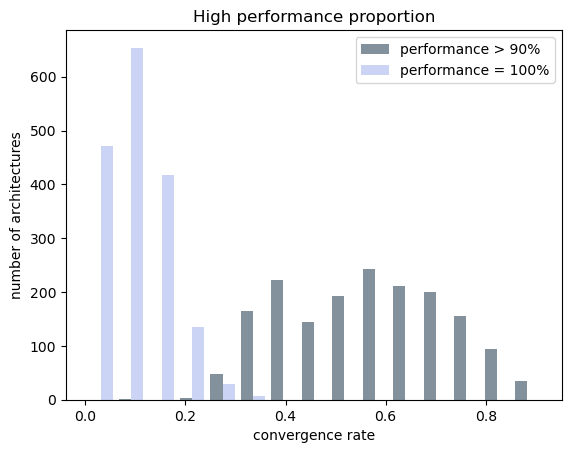

In [140]:
fig = plt.figure()
plt.hist([first_analysis_df['success_percent_0.9'], first_analysis_df['success_percent_1.0']], bins=15,
         label=['performance > 90%', 'performance = 100%'], alpha=0.7, color=COLORS[:2])
plt.title('High performance proportion')
plt.xlabel('convergence rate')
plt.ylabel('number of architectures')
plt.legend()
plt.show()
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/all_prec_{time_str}.png')

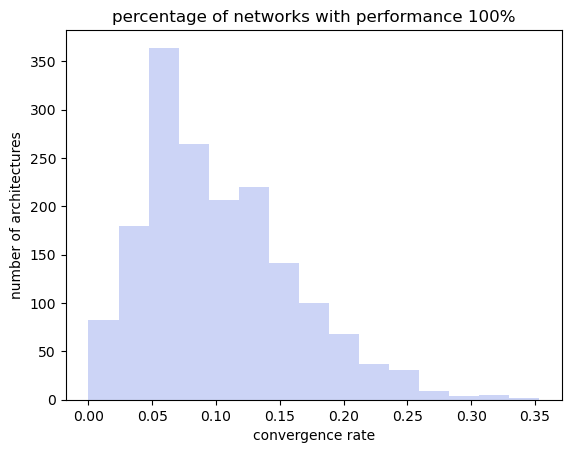

In [141]:
fig = plt.figure()
plt.hist(first_analysis_df['success_percent_1.0'], bins=15, alpha=0.7, color=COLORS[1])
plt.title('percentage of networks with performance 100%')
plt.xlabel('convergence rate')
plt.ylabel('number of architectures')
plt.show()
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/100_prec_{time_str}.png')

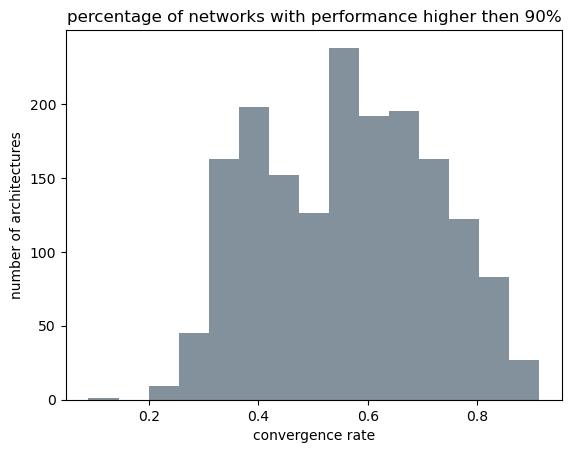

In [142]:
fig = plt.figure()
plt.hist(first_analysis_df['success_percent_0.9'], bins=15, alpha=0.7, color=COLORS[0])
plt.title('percentage of networks with performance higher then 90%')
plt.xlabel('convergence rate')
plt.ylabel('number of architectures')
plt.show()
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/90_prec_{time_str}.png')

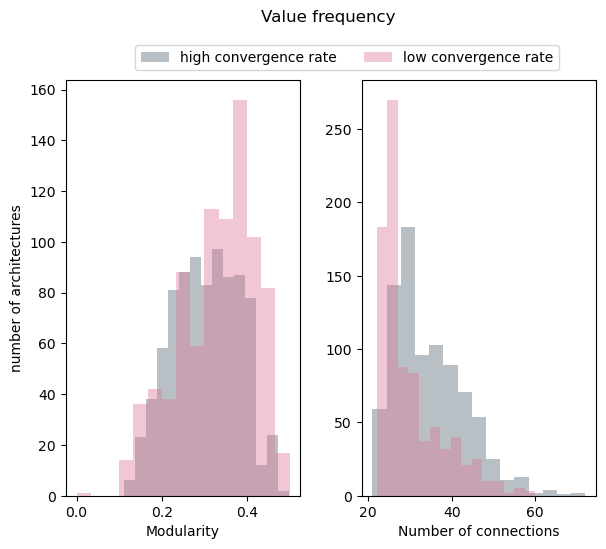

In [139]:
threshold = 0.5
density = False
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6))

ax1.set_ylabel('number of architectures')
ax1.hist([
    first_analysis_df['modularity'][
        first_analysis_df['success_percent_1.0'] > first_analysis_df['success_percent_1.0'].quantile(threshold)],
], bins=15, density=density, alpha=0.4, color=COLORS[0],
    label=['high convergence rate', 'low convergence rate'])
ax1.hist([
    first_analysis_df['modularity'][
        first_analysis_df['success_percent_1.0'] <= first_analysis_df['success_percent_1.0'].quantile(threshold)],
], bins=15, alpha=0.4, density=density, color=COLORS[2],
    label=['low convergence rate'])
ax2.hist([
    first_analysis_df['num_connections'][
        first_analysis_df['success_percent_1.0'] > first_analysis_df['success_percent_1.0'].quantile(threshold)],
], bins=15, alpha=0.4, density=density, color=COLORS[0],
    label=['high convergence rate', 'low convergence rate'])
ax2.hist([
    first_analysis_df['num_connections'][
        first_analysis_df['success_percent_1.0'] <= first_analysis_df['success_percent_1.0'].quantile(threshold)],
], bins=15, alpha=0.4, density=density, color=COLORS[2],
    label=['high convergence rate', 'low convergence rate'])
fig.suptitle('Value frequency', y=0.92)
ax1.set_xlabel('Modularity')
ax2.set_xlabel('Number of connections')
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.9, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.9, ])
ax1.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(1.2, 1.1))
plt.show()
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/mod_and_connections{time_str}.png')

1714


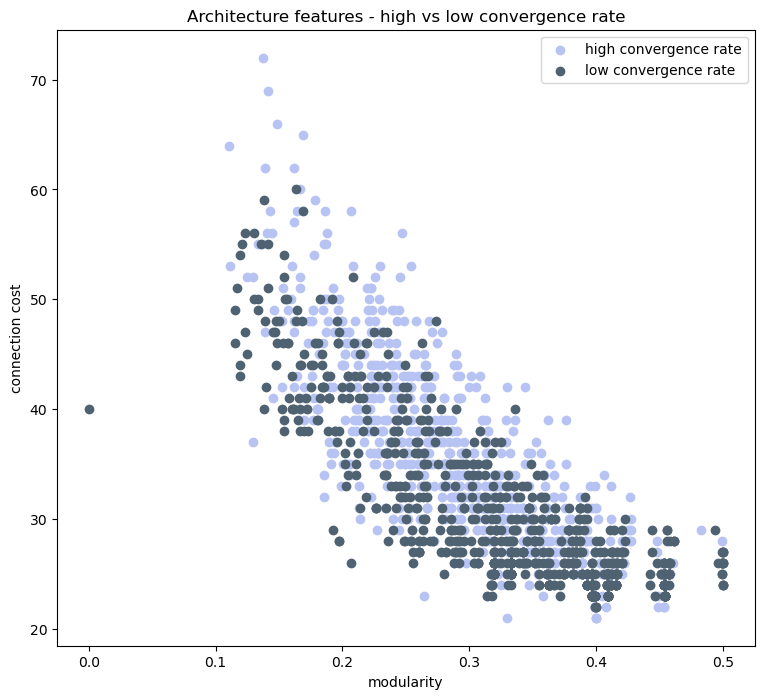

In [134]:
quantile_threshold = 0.50
threshold = first_analysis_df['success_percent_1.0'].quantile(quantile_threshold)

low_convergence_df = first_analysis_df[first_analysis_df['success_percent_1.0'] <= threshold]
high_convergence_df = first_analysis_df[first_analysis_df['success_percent_1.0'] > threshold]
print(low_convergence_df.shape[0] + high_convergence_df.shape[0])
plt.figure(figsize=(9, 8))

plt.scatter(high_convergence_df['modularity'], high_convergence_df['num_connections'], c=COLORS[1],
            label='high convergence rate')
plt.scatter(low_convergence_df['modularity'], low_convergence_df['num_connections'], c=COLORS[0],
            label='low convergence rate', )

plt.xlabel('modularity')
plt.ylabel('connection cost')

plt.title('Architecture features - high vs low convergence rate')
plt.legend()
if save:
    plt.savefig(f'{base_path}/plots/teachbility_plots/mod_vd_connection_convergence_rate_high_low_{time_str}.png')

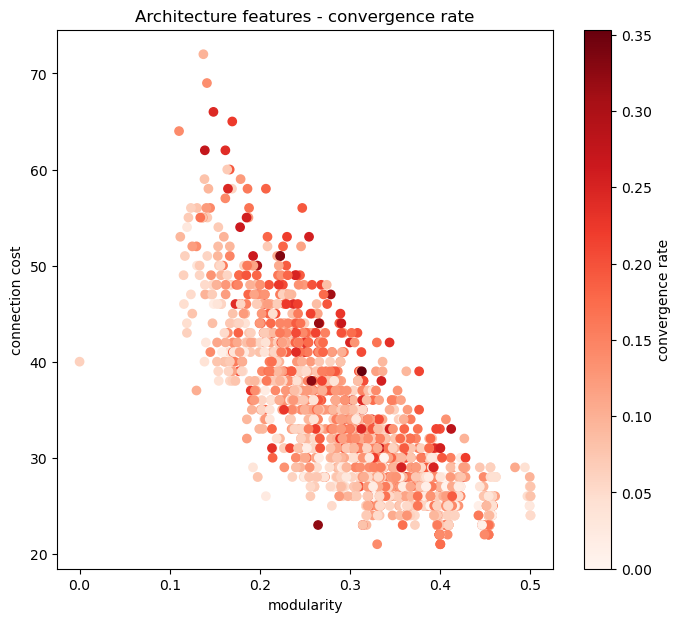

In [128]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, )
cmap = 'Reds'
p3d = plt.scatter(first_analysis_df['modularity'], first_analysis_df['num_connections'],
                  c=first_analysis_df['success_percent_1.0'],
                  cmap=cmap, )
fig.colorbar(p3d, label='convergence rate')
ax.set_xlabel('modularity')
ax.set_ylabel('connection cost')

plt.title('Architecture features - convergence rate')
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/mod_vd_connection_convergence_rate_{time_str}.png')

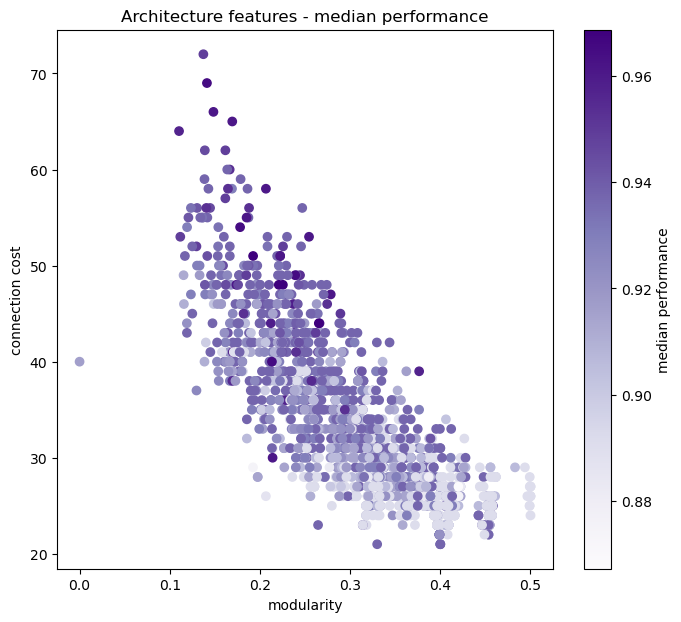

In [131]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, )
cmap = 'Purples'
p3d = plt.scatter(first_analysis_df['modularity'], first_analysis_df['num_connections'],
                  c=first_analysis_df['median_performance'],
                  cmap=cmap, )
fig.colorbar(p3d, label='median performance')
ax.set_xlabel('modularity')
ax.set_ylabel('connection cost')
ax.set_title('Architecture features - median performance')
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/mod_vd_connection_median_{time_str}.png')

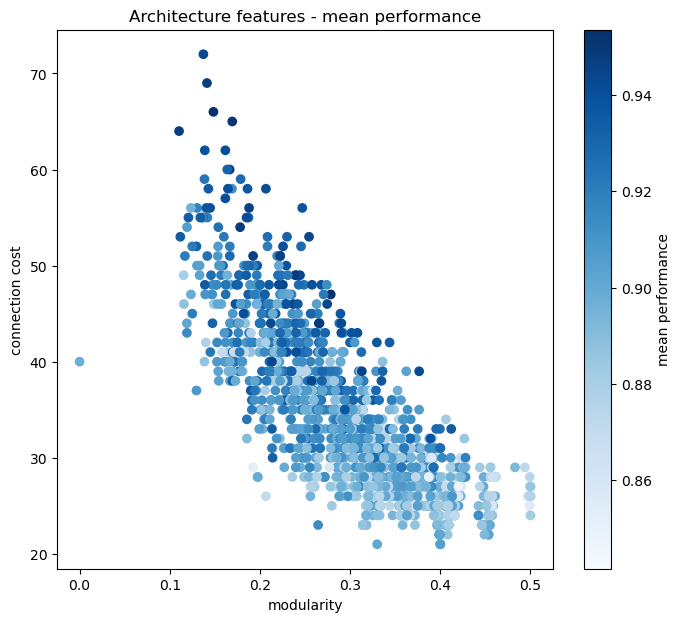

In [130]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, )
cmap = 'Blues'
p3d = plt.scatter(first_analysis_df['modularity'], first_analysis_df['num_connections'],
                  c=first_analysis_df['mean_performance'],
                  cmap=cmap, )
fig.colorbar(p3d, label='mean performance')
ax.set_xlabel('modularity')
ax.set_ylabel('connection cost')
ax.set_title('Architecture features - mean performance')
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/mod_vd_connection_mean_{time_str}.png')

1714


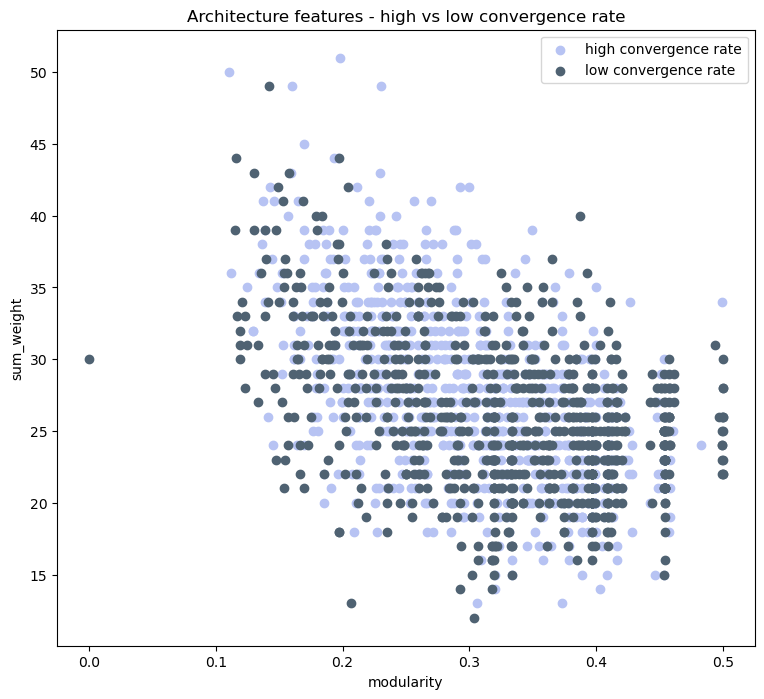

In [148]:
quantile_threshold = 0.50
threshold = first_analysis_df['success_percent_1.0'].quantile(quantile_threshold)

low_convergence_df = first_analysis_df[first_analysis_df['success_percent_1.0'] <= threshold]
high_convergence_df = first_analysis_df[first_analysis_df['success_percent_1.0'] > threshold]
print(low_convergence_df.shape[0] + high_convergence_df.shape[0])
plt.figure(figsize=(9, 8))

plt.scatter(high_convergence_df['modularity'], high_convergence_df['sum_weight'], c=COLORS[1],
            label='high convergence rate')
plt.scatter(low_convergence_df['modularity'], low_convergence_df['sum_weight'], c=COLORS[0],
            label='low convergence rate', )

plt.xlabel('modularity')
plt.ylabel('sum_weight')

plt.title('Architecture features - high vs low convergence rate')
plt.legend()
if save:
    plt.savefig(f'{base_path}/plots/teachbility_plots/mod_vd_sum_weight_convergence_rate_high_low_{time_str}.png')

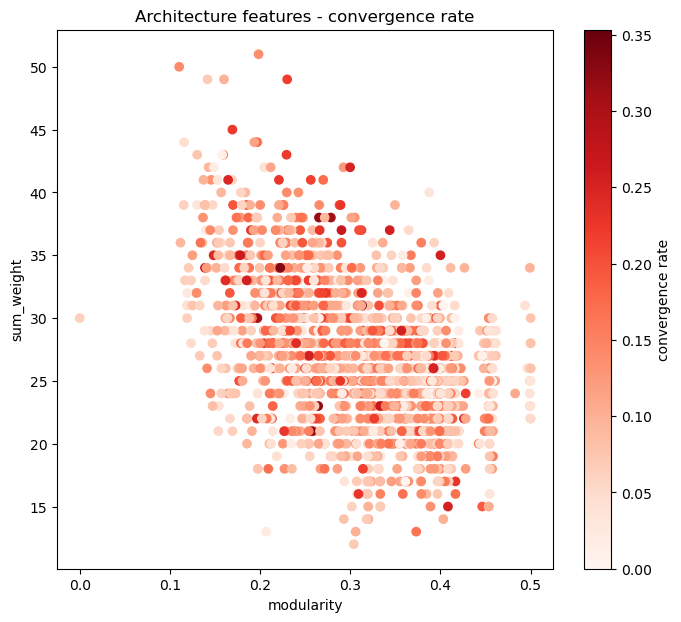

In [149]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, )
cmap = 'Reds'
p3d = plt.scatter(first_analysis_df['modularity'], first_analysis_df['sum_weight'],
                  c=first_analysis_df['success_percent_1.0'],
                  cmap=cmap, )
fig.colorbar(p3d, label='convergence rate')
ax.set_xlabel('modularity')
ax.set_ylabel('sum_weight')

plt.title('Architecture features - convergence rate')
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/mod_vd_sum_weight_convergence_rate_{time_str}.png')

Text(0.5, 1.0, 'The relation between modularity and convergence rate')

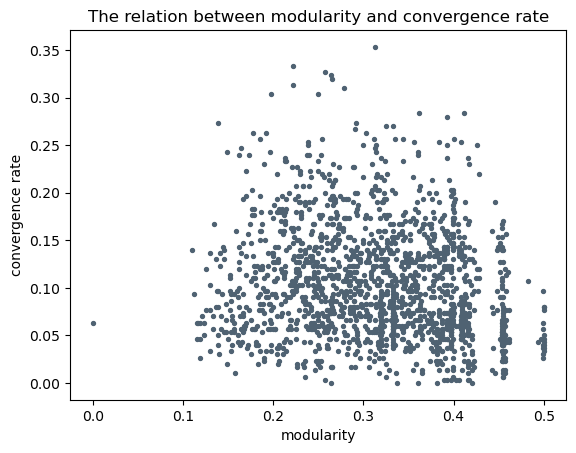

In [137]:
plt.figure()
plt.scatter(first_analysis_df['modularity'], first_analysis_df['success_percent_1.0'], s=8, c=COLORS[0])
plt.xlabel('modularity')
plt.ylabel('convergence rate')
plt.title('The relation between modularity and convergence rate')

Text(0.5, 1.0, 'The relation between modularity and convergence rate')

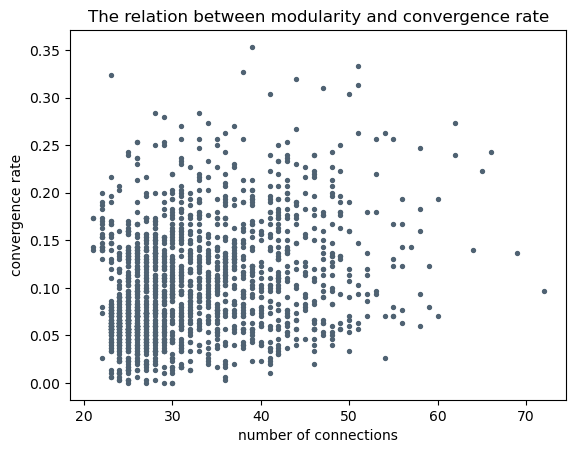

In [138]:
plt.figure()
plt.scatter(first_analysis_df['num_connections'], first_analysis_df['success_percent_1.0'], s=8, c=COLORS[0])
plt.xlabel('number of connections')
plt.ylabel('convergence rate')
plt.title('The relation between modularity and convergence rate')

Text(0.5, 1.0, 'The relation between modularity and convergence rate')

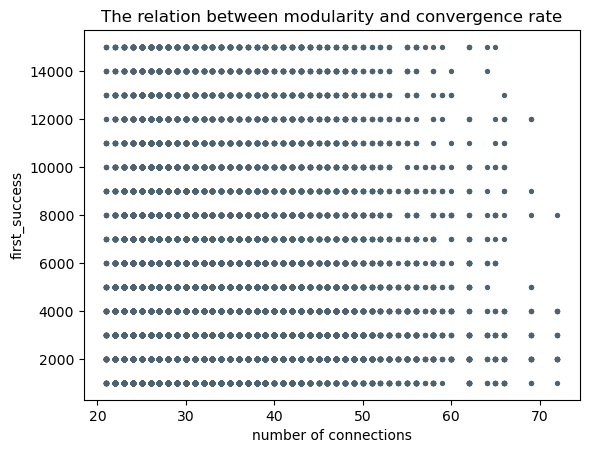

In [44]:
plt.figure()
plt.scatter(all_res_df['num_connections'], all_res_df['first_success_1.0'], s=8, c=COLORS[0])
plt.xlabel('number of connections')
plt.ylabel('first_success')
plt.title('The relation between modularity and convergence rate')

Text(0.5, 1.0, 'The relation between modularity and convergence rate')

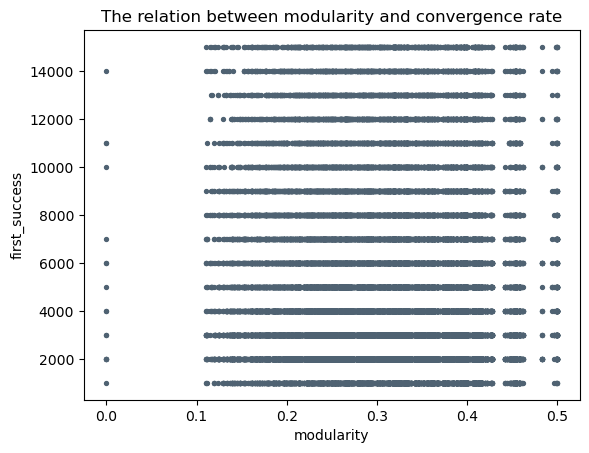

In [46]:
plt.figure()
plt.scatter(all_res_df['modularity'], all_res_df['first_success_1.0'], s=8, c=COLORS[0])
plt.xlabel('modularity')
plt.ylabel('first_success')
plt.title('The relation between modularity and convergence rate')

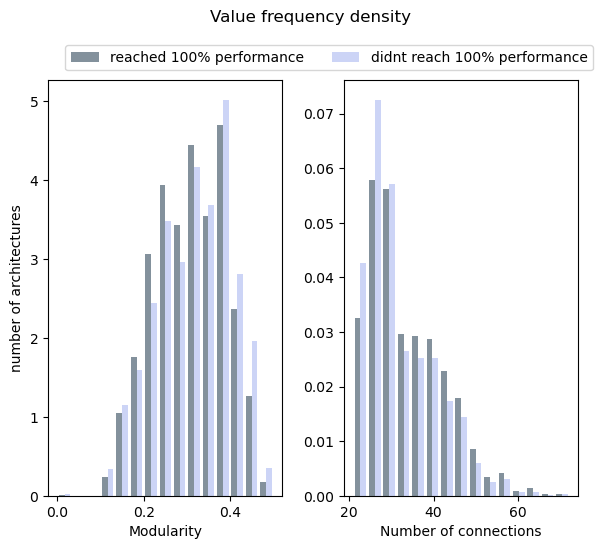

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6))

ax1.set_ylabel('number of architectures')
ax1.hist([
    all_res_df['modularity'][all_res_df['Performances'] == 1.0],
    all_res_df['modularity'][all_res_df['Performances'] != 1.0],
], bins=15, alpha=0.7, color=COLORS[:2], density=True,
    label=['reached 100% performance', 'didnt reach 100% performance'])
ax2.hist([
    all_res_df['num_connections'][all_res_df['Performances'] == 1.0],
    all_res_df['num_connections'][all_res_df['Performances'] != 1.0],
], bins=15, alpha=0.7, color=COLORS[:2], density=True,
    label=['reached 100% performance', 'didnt reach 100% performance'])

fig.suptitle('Value frequency density', y=0.92)
ax1.set_xlabel('Modularity')
ax2.set_xlabel('Number of connections')
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.9, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.9, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(1.2, 1.1))
plt.show()
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/mod_connection_freq_{dt.now().strftime("%Y-%m-%d-%H-%M")}.png')


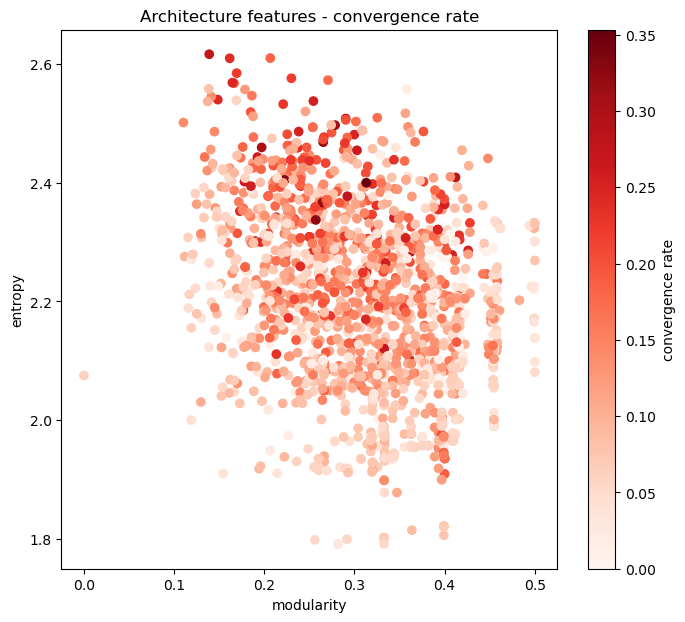

In [174]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, )
cmap = 'Reds'
p3d = plt.scatter(first_analysis_df['modularity'], first_analysis_df['entropy'],
                  c=first_analysis_df['success_percent_1.0'],
                  cmap=cmap, )
fig.colorbar(p3d, label='convergence rate')
ax.set_xlabel('modularity')
ax.set_ylabel('entropy')

plt.title('Architecture features - convergence rate')
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/mod_vs_entropy_convergence_rate_{time_str}.png')

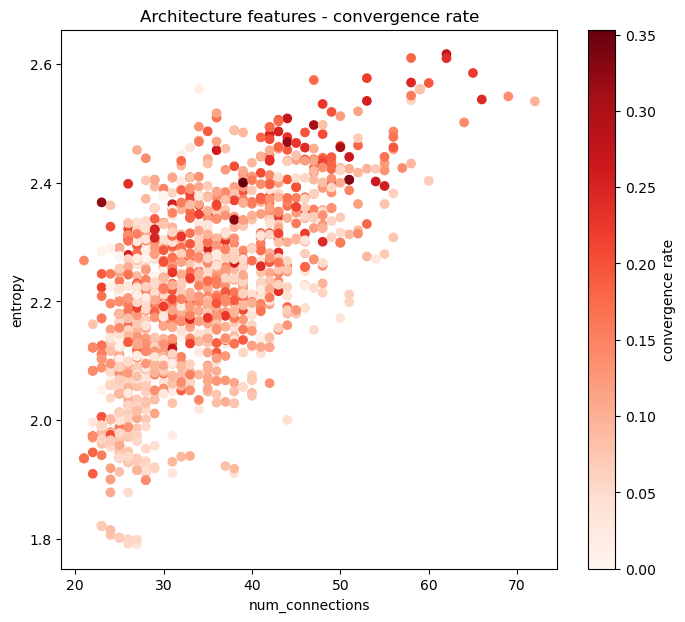

In [171]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, )
cmap = 'Reds'
p3d = plt.scatter(first_analysis_df['num_connections'], first_analysis_df['entropy'],
                  c=first_analysis_df['success_percent_1.0'],
                  cmap=cmap, )
fig.colorbar(p3d, label='convergence rate')
ax.set_xlabel('num_connections')
ax.set_ylabel('entropy')

plt.title('Architecture features - convergence rate')
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/mconnection_vs_entropy_convergence_rate_{time_str}.png')

In [182]:
def pop_std(x):
    return x.std(ddof=0)


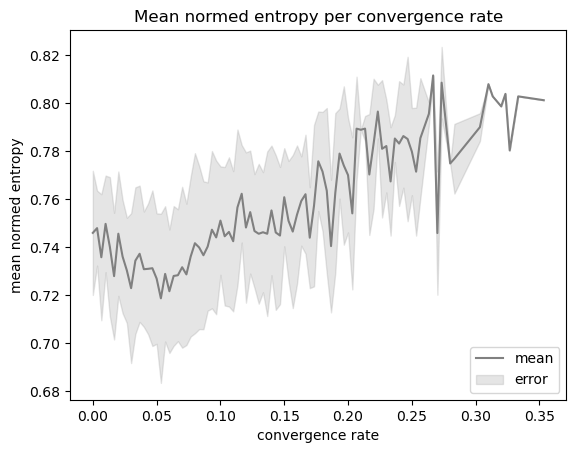

In [185]:
df = first_analysis_df[['normed_entropy', 'success_percent_1.0']]
r = df.groupby(['success_percent_1.0'], as_index=False).agg(
                      {'normed_entropy':['mean',pop_std]})
r.columns = [ 'success_percent_1.0', 'mean_normed_entropy','std_normed_entropy']
plt.figure()
plt.plot(r['success_percent_1.0'], r['mean_normed_entropy'], '-', color='gray',  label = 'mean')


plt.fill_between(r['success_percent_1.0'], r['mean_normed_entropy']- r['std_normed_entropy'], r['mean_normed_entropy'] + r['std_normed_entropy'],
                 color='gray', alpha=0.2, label = 'error')
plt.legend(loc='lower right')
plt.title('Mean normed entropy per convergence rate')
plt.ylabel('mean normed entropy')
plt.xlabel('convergence rate')
if save:
   plt.savefig(f'{base_path}/plots/teachbility_plots/mean_normed_entropy_vs_convergence_rate_{time_str}.png')

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_3208/1186101946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['convergence rate'] = pd.cut(x = df['success_percent_1.0'], bins = bins, labels = labels, include_lowest = True)


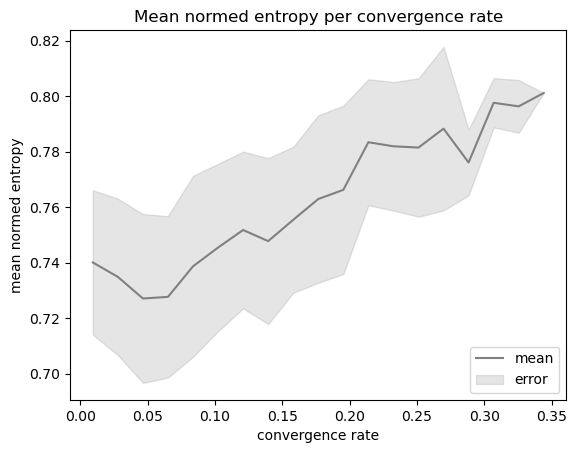

In [213]:
df = first_analysis_df[['normed_entropy', 'success_percent_1.0']]
vals = np.linspace(0, df['success_percent_1.0'].max(), 35)
bins =vals.tolist()
labels = [(vals[i] + vals[i+1]) / 2 for i in range(len(vals)-1)]
df['convergence rate'] = pd.cut(x = df['success_percent_1.0'], bins = bins, labels = labels, include_lowest = True)
r2 = df.groupby(['convergence rate'], as_index=False).agg(
                      {'normed_entropy':['mean',pop_std]}).dropna()
r2.columns = [ 'convergence rate', 'mean_normed_entropy','std_normed_entropy']
plt.figure()
plt.plot(r2['convergence rate'], r2['mean_normed_entropy'], '-', color='gray',  label = 'mean')


plt.fill_between(r2['convergence rate'], r2['mean_normed_entropy']- r2['std_normed_entropy'], r2['mean_normed_entropy'] + r2['std_normed_entropy'],
                 color='gray', alpha=0.2, label = 'error')
plt.legend(loc='lower right')
plt.title('Mean normed entropy per convergence rate')
plt.ylabel('mean normed entropy')
plt.xlabel('convergence rate')
if save:
       plt.savefig(f'{base_path}/plots/teachbility_plots/{time_str}_mean_normed_entropy_vs_mean_convergence_rate.png')

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_3208/2077570309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['convergence rate'] = pd.cut(x = df['success_percent_1.0'], bins = bins, labels = labels, include_lowest = True)


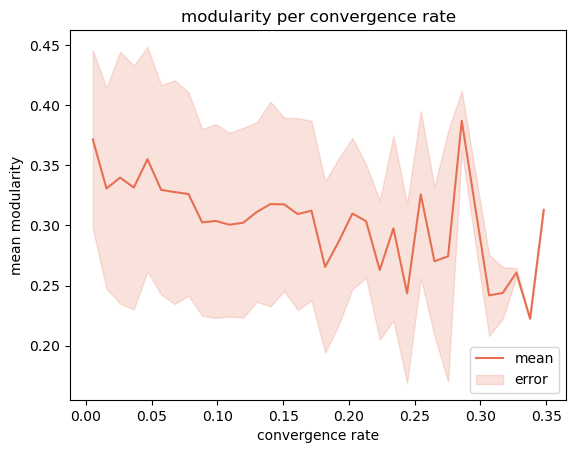

In [217]:
df = first_analysis_df[['modularity', 'success_percent_1.0']]
vals = np.linspace(0, df['success_percent_1.0'].max(), 35)
bins =vals.tolist()
labels = [(vals[i] + vals[i+1]) / 2 for i in range(len(vals)-1)]
df['convergence rate'] = pd.cut(x = df['success_percent_1.0'], bins = bins, labels = labels, include_lowest = True)
r2 = df.groupby(['convergence rate'], as_index=False).agg(
                      {'modularity':['mean',pop_std]}).dropna()
r2.columns = [ 'convergence rate', 'mean_modularity','std_modularity']
plt.figure()
plt.plot(r2['convergence rate'], r2['mean_modularity'], '-', color=COLORS[5],  label = 'mean')


plt.fill_between(r2['convergence rate'], r2['mean_modularity']- r2['std_modularity'], r2['mean_modularity'] + r2['std_modularity'],
                 color=COLORS[5], alpha=0.2, label = 'error')
plt.legend(loc='lower right')
plt.title('modularity per convergence rate')
plt.ylabel('mean modularity')
plt.xlabel('convergence rate')
if save:
       plt.savefig(f'{base_path}/plots/teachbility_plots/{time_str}_mean_modularity_vs_mean_convergence_rate.png')

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_3208/3998968526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['convergence rate'] = pd.cut(x = df['success_percent_1.0'], bins = bins, labels = labels, include_lowest = True)


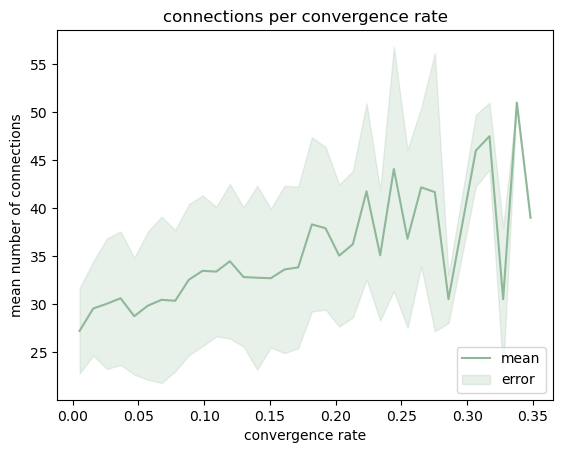

In [216]:
df = first_analysis_df[['num_connections', 'success_percent_1.0']]
vals = np.linspace(0, df['success_percent_1.0'].max(), 35)
bins =vals.tolist()
labels = [(vals[i] + vals[i+1]) / 2 for i in range(len(vals)-1)]
df['convergence rate'] = pd.cut(x = df['success_percent_1.0'], bins = bins, labels = labels, include_lowest = True)
r2 = df.groupby(['convergence rate'], as_index=False).agg(
                      {'num_connections':['mean',pop_std]}).dropna()
r2.columns = [ 'convergence rate', 'mean_num_connections','std_num_connections']
plt.figure()
plt.plot(r2['convergence rate'], r2['mean_num_connections'], '-', color=COLORS[3],  label = 'mean')


plt.fill_between(r2['convergence rate'], r2['mean_num_connections']- r2['std_num_connections'], r2['mean_num_connections'] + r2['std_num_connections'],
                 color=COLORS[3], alpha=0.2, label = 'error')
plt.legend(loc='lower right')
plt.title('connections per convergence rate')
plt.ylabel('mean number of connections')
plt.xlabel('convergence rate')
if save:
       plt.savefig(f'{base_path}/plots/teachbility_plots/{time_str}_mean_conn_vs_mean_convergence_rate.png')

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_3208/2408543317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_performance'] = pd.cut(x = df['mean_performance'], bins = bins, labels = labels, include_lowest = True)


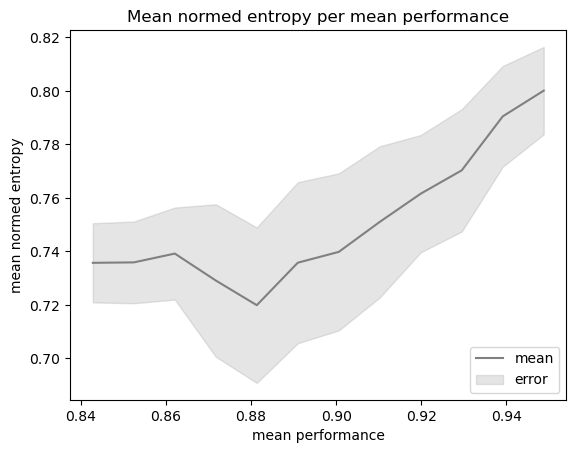

In [215]:
df = first_analysis_df[['normed_entropy', 'mean_performance']]
vals = np.linspace(0, df['mean_performance'].max(), 100)
bins =vals.tolist()
labels = [(vals[i] + vals[i+1]) / 2 for i in range(len(vals)-1)]
df['mean_performance'] = pd.cut(x = df['mean_performance'], bins = bins, labels = labels, include_lowest = True)
r2 = df.groupby(['mean_performance'], as_index=False).agg(
                      {'normed_entropy':['mean',pop_std]}).dropna()
r2.columns = [ 'mean_performance', 'mean_normed_entropy','std_normed_entropy']
plt.figure()
plt.plot(r2['mean_performance'], r2['mean_normed_entropy'], '-', color='gray',  label = 'mean')


plt.fill_between(r2['mean_performance'], r2['mean_normed_entropy']- r2['std_normed_entropy'], r2['mean_normed_entropy'] + r2['std_normed_entropy'],
                 color='gray', alpha=0.2, label = 'error')
plt.legend(loc='lower right')
plt.title('Mean normed entropy per mean performance')
plt.ylabel('mean normed entropy')
plt.xlabel('mean performance')
if save:
       plt.savefig(f'{base_path}/plots/teachbility_plots/{time_str}_mean_normed_entropy_vs_mean_performance.png')

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_3208/1222220369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_performance'] = pd.cut(x = df['mean_performance'], bins = bins, labels = labels, include_lowest = True)


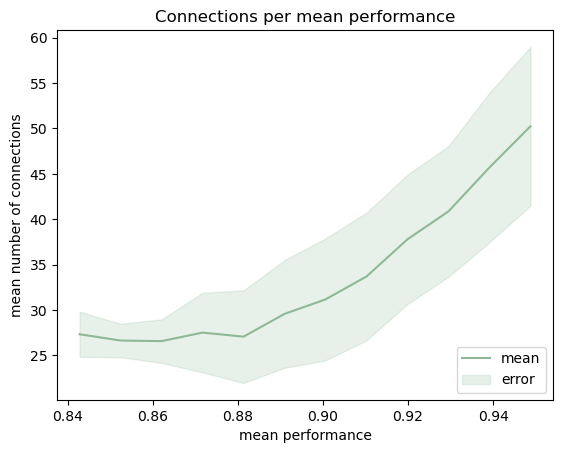

In [211]:
df = first_analysis_df[['num_connections', 'mean_performance']]
vals = np.linspace(0, df['mean_performance'].max(), 100)
bins =vals.tolist()
labels = [(vals[i] + vals[i+1]) / 2 for i in range(len(vals)-1)]
df['mean_performance'] = pd.cut(x = df['mean_performance'], bins = bins, labels = labels, include_lowest = True)
r2 = df.groupby(['mean_performance'], as_index=False).agg(
                      {'num_connections':['mean',pop_std]}).dropna()
r2.columns = [ 'mean_performance', 'mean_num_connections','std_num_connections']
plt.figure()
plt.plot(r2['mean_performance'], r2['mean_num_connections'], '-', color=COLORS[3],  label = 'mean')


plt.fill_between(r2['mean_performance'], r2['mean_num_connections']- r2['std_num_connections'], r2['mean_num_connections'] + r2['std_num_connections'],
                color=COLORS[3], alpha=0.2, label = 'error')
plt.legend(loc='lower right')
plt.title('Connections per mean performance')
plt.ylabel('mean number of connections')
plt.xlabel('mean performance')
if save:
       plt.savefig(f'{base_path}/plots/teachbility_plots/{time_str}_mean_num_connections_vs_mean_mean_performance.png')

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_3208/4109826958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_performance'] = pd.cut(x = df['mean_performance'], bins = bins, labels = labels, include_lowest = True)


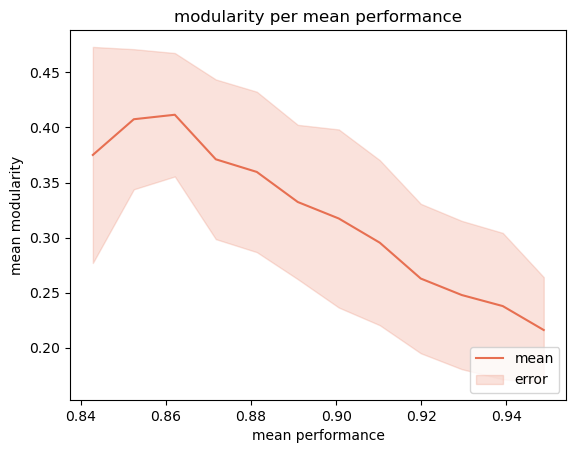

In [212]:
df = first_analysis_df[['modularity', 'mean_performance']]
vals = np.linspace(0, df['mean_performance'].max(), 100)
bins =vals.tolist()
labels = [(vals[i] + vals[i+1]) / 2 for i in range(len(vals)-1)]
df['mean_performance'] = pd.cut(x = df['mean_performance'], bins = bins, labels = labels, include_lowest = True)
r2 = df.groupby(['mean_performance'], as_index=False).agg(
                      {'modularity':['mean',pop_std]}).dropna()
r2.columns = [ 'mean_performance', 'mean_modularity','std_modularity']
plt.figure()
plt.plot(r2['mean_performance'], r2['mean_modularity'], '-', color=COLORS[5],  label = 'mean')


plt.fill_between(r2['mean_performance'], r2['mean_modularity']- r2['std_modularity'], r2['mean_modularity'] + r2['std_modularity'],
                color=COLORS[5], alpha=0.2, label = 'error')
plt.legend(loc='lower right')
plt.title('modularity per mean performance')
plt.ylabel('mean modularity')
plt.xlabel('mean performance')
if save:
       plt.savefig(f'{base_path}/plots/teachbility_plots/{time_str}_mean_modularity_vs_mean_mean_performance.png')

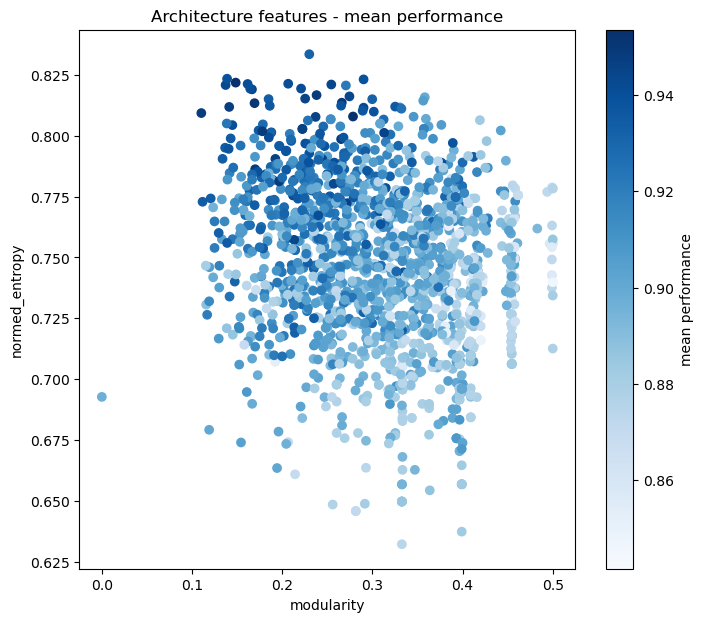

In [192]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, )
cmap = 'Blues'
p3d = plt.scatter(first_analysis_df['modularity'], first_analysis_df['normed_entropy'],
                  c=first_analysis_df['mean_performance'],
                  cmap=cmap, )
fig.colorbar(p3d, label='mean performance')
ax.set_xlabel('modularity')
ax.set_ylabel('normed_entropy')
ax.set_title('Architecture features - mean performance')
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/{time_str}_entropy_vs_mod_mean.png')

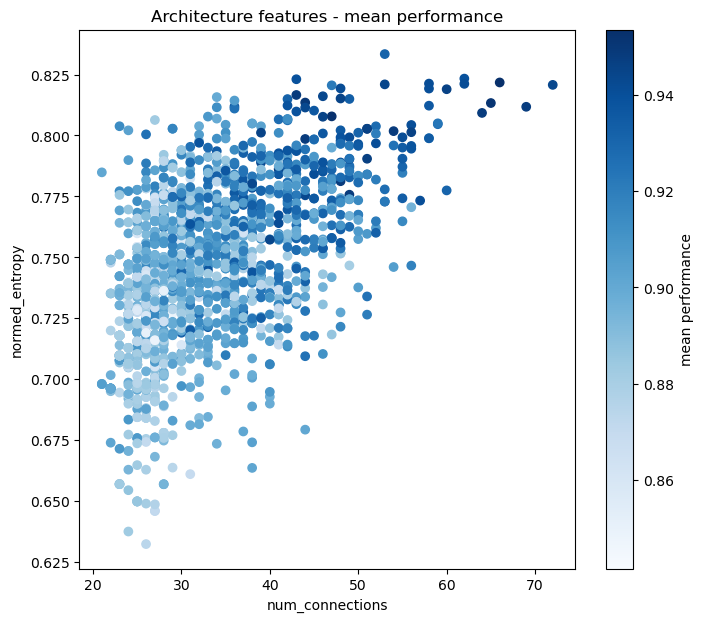

In [193]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, )
cmap = 'Blues'
p3d = plt.scatter(first_analysis_df['num_connections'], first_analysis_df['normed_entropy'],
                  c=first_analysis_df['mean_performance'],
                  cmap=cmap, )
fig.colorbar(p3d, label='mean performance')
ax.set_xlabel('num_connections')
ax.set_ylabel('normed_entropy')
ax.set_title('Architecture features - mean performance')
if save:
    fig.savefig(f'{base_path}/plots/teachbility_plots/{time_str}_normed_entropy_vs_num_connections_mean.png')